# 遺伝的アルゴリズムを用いた最適化パッケージvcoptの使用方法
参考文献：[お手軽最適化パッケージ「vcopt」仕様書](https://vigne-cla.com/vcopt-specification/#toc14)

## 0. 使用環境の例
* Windows 10 Entreprise
* Python3.7.6 (Anaconda)

## 1. 導入方法
* pipでvcoptをインストール  
`pip install vcopt`
* アップデートする場合  
`pip install -U vcopt`

## 2. 基本的な使い方 (連続値のパラメータの最適化)
* Rosenbrock関数の最小値を求める  
[Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function)  
$f({\bf x}) = f(x_1, x_2,\cdots,x_N) = \sum_{i=1}^{N-1}[100(x_{i+1}-x_{i}^2)^2+(1-x_{i})^2]$  
    - 変数の範囲は$-5.12 \leq x_i \leq 5.12$
    - 最適解は$f_{min}(1,\cdots,1)=0$
* Rosenbrock関数は変数間の依存性があり、最急降下法などの導関数を用いるアルゴリズムでは収束が遅くなる。

In [1]:
# 目的関数(Rosenbrock)の定義
def rosenbrock(x):
    k=0
    for i in range(len(x)-1):
       k += 100 * (x[i+1] - x[i]**2)**2 + (1-x[i])**2
    return k

# 変数の範囲
n = 5 # 次元
param_range = [[-5.12, 5.12] for _ in range(n)]
print(param_range)

[[-5.12, 5.12], [-5.12, 5.12], [-5.12, 5.12], [-5.12, 5.12], [-5.12, 5.12]]


C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


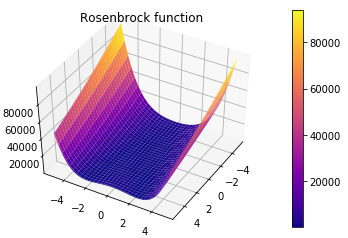

In [25]:
# Rosenbrockの可視化
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# 格子データの作成
x = [i/100*10.24-5.12 for i in range(100+1)]
y = np.zeros([len(x),len(x)])
for r in range(len(x)):
    for c in range(len(x)):
        y[r, c] = rosenbrock([x[r], x[c]])
X1, X2 = np.meshgrid(x, x)
# 3Dプロットで表示
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, y, cmap="plasma", facecolor="w")
fig.colorbar(surf)
ax.view_init(elev=45, azim=30)
ax.set_title('Rosenbrock function')
fig.show()

In [17]:
# vcoptの最適化を実行
from vcopt import vcopt
param, score = vcopt().rcGA(param_range, # 変数の範囲
                            rosenbrock,  # 目的関数
                            -9999,       # 目標値
                            show_pool_func='print',# 表示オプション
                           ) 

___________________ info ___________________
para_range : n=5
score_func : <class 'function'>
aim : -9999.0
show_pool_func : 'print'
seed : None
pool_num : 50
max_gen : None
core_num : 1 (*vcopt, vc-grendel)
___________________ start __________________
Scoring first gen 50/50        
gen=0, best_score=36317.4971, mean_score=154287.5313, mean_gap=164286.5313, time=0.3
gen=50, best_score=15037.9459, mean_score=100169.0721, mean_gap=110168.0721, time=0.3
gen=100, best_score=7684.9472, mean_score=60821.6427, mean_gap=70820.6427, time=0.4
gen=150, best_score=713.3672, mean_score=32146.2761, mean_gap=42145.2761, time=0.4
gen=200, best_score=713.3672, mean_score=13856.9941, mean_gap=23855.9941, time=0.4
gen=250, best_score=221.4853, mean_score=7328.5609, mean_gap=17327.5609, time=0.4
gen=300, best_score=135.6048, mean_score=3836.6044, mean_gap=13835.6044, time=0.4
gen=350, best_score=100.9821, mean_score=1189.9461, mean_gap=11188.9461, time=0.4
gen=400, best_score=69.6636, mean_score=527.3111

gen=5100, best_score=0.3143, mean_score=1.1253, mean_gap=10000.1253, time=1.6
gen=5150, best_score=0.3143, mean_score=1.1253, mean_gap=10000.1253, time=1.6
gen=5200, best_score=0.3142, mean_score=1.1202, mean_gap=10000.1202, time=1.6
gen=5250, best_score=0.3142, mean_score=1.1201, mean_gap=10000.1201, time=1.6
gen=5300, best_score=0.3141, mean_score=1.1201, mean_gap=10000.1201, time=1.6
gen=5350, best_score=0.3141, mean_score=1.1171, mean_gap=10000.1171, time=1.6
gen=5400, best_score=0.314, mean_score=1.1171, mean_gap=10000.1171, time=1.6
gen=5450, best_score=0.314, mean_score=1.1015, mean_gap=10000.1015, time=1.6
gen=5500, best_score=0.3139, mean_score=1.1014, mean_gap=10000.1014, time=1.7
gen=5550, best_score=0.3139, mean_score=1.1014, mean_gap=10000.1014, time=1.7
gen=5600, best_score=0.3138, mean_score=1.1013, mean_gap=10000.1013, time=1.7
gen=5650, best_score=0.3137, mean_score=1.1013, mean_gap=10000.1013, time=1.7
gen=5700, best_score=0.3137, mean_score=1.1012, mean_gap=10000.101

gen=11250, best_score=0.3056, mean_score=0.6878, mean_gap=9999.6878, time=3.0
gen=11300, best_score=0.3055, mean_score=0.6877, mean_gap=9999.6877, time=3.0
gen=11350, best_score=0.3055, mean_score=0.6876, mean_gap=9999.6876, time=3.1
gen=11400, best_score=0.3055, mean_score=0.6876, mean_gap=9999.6876, time=3.1
gen=11450, best_score=0.3054, mean_score=0.6875, mean_gap=9999.6875, time=3.1
gen=11500, best_score=0.3052, mean_score=0.6874, mean_gap=9999.6874, time=3.1
gen=11550, best_score=0.3051, mean_score=0.6873, mean_gap=9999.6873, time=3.1
gen=11600, best_score=0.305, mean_score=0.6873, mean_gap=9999.6873, time=3.1
gen=11650, best_score=0.3049, mean_score=0.6872, mean_gap=9999.6872, time=3.1
gen=11700, best_score=0.3049, mean_score=0.687, mean_gap=9999.687, time=3.1
gen=11750, best_score=0.3048, mean_score=0.6869, mean_gap=9999.6869, time=3.1
gen=11800, best_score=0.3047, mean_score=0.6868, mean_gap=9999.6868, time=3.1
gen=11850, best_score=0.3047, mean_score=0.6868, mean_gap=9999.6868

gen=17100, best_score=0.3002, mean_score=0.5143, mean_gap=9999.5143, time=4.5
gen=17150, best_score=0.3002, mean_score=0.5143, mean_gap=9999.5143, time=4.5
gen=17200, best_score=0.3002, mean_score=0.5143, mean_gap=9999.5143, time=4.5
gen=17250, best_score=0.3002, mean_score=0.5143, mean_gap=9999.5143, time=4.5
gen=17300, best_score=0.3002, mean_score=0.5143, mean_gap=9999.5143, time=4.5
gen=17350, best_score=0.3002, mean_score=0.5136, mean_gap=9999.5136, time=4.5
gen=17400, best_score=0.3002, mean_score=0.5136, mean_gap=9999.5136, time=4.6
gen=17450, best_score=0.3002, mean_score=0.5136, mean_gap=9999.5136, time=4.6
gen=17500, best_score=0.3002, mean_score=0.5136, mean_gap=9999.5136, time=4.6
gen=17550, best_score=0.3002, mean_score=0.5136, mean_gap=9999.5136, time=4.6
gen=17600, best_score=0.3002, mean_score=0.5031, mean_gap=9999.5031, time=4.6
gen=17650, best_score=0.3002, mean_score=0.5031, mean_gap=9999.5031, time=4.6
gen=17700, best_score=0.3002, mean_score=0.5031, mean_gap=9999.5

gen=22500, best_score=0.2996, mean_score=0.4922, mean_gap=9999.4922, time=5.9
gen=22550, best_score=0.2996, mean_score=0.4922, mean_gap=9999.4922, time=5.9
gen=22600, best_score=0.2996, mean_score=0.4922, mean_gap=9999.4922, time=5.9
gen=22650, best_score=0.2996, mean_score=0.4922, mean_gap=9999.4922, time=5.9
gen=22700, best_score=0.2996, mean_score=0.4922, mean_gap=9999.4922, time=5.9
gen=22750, best_score=0.2996, mean_score=0.4922, mean_gap=9999.4922, time=6.0
gen=22800, best_score=0.2996, mean_score=0.4804, mean_gap=9999.4804, time=6.0
gen=22850, best_score=0.2996, mean_score=0.4804, mean_gap=9999.4804, time=6.0
gen=22900, best_score=0.2996, mean_score=0.4804, mean_gap=9999.4804, time=6.0
gen=22950, best_score=0.2996, mean_score=0.4804, mean_gap=9999.4804, time=6.0
gen=23000, best_score=0.2996, mean_score=0.4804, mean_gap=9999.4804, time=6.0
gen=23050, best_score=0.2996, mean_score=0.4804, mean_gap=9999.4804, time=6.0
gen=23100, best_score=0.2995, mean_score=0.4804, mean_gap=9999.4

gen=27850, best_score=0.2983, mean_score=0.4762, mean_gap=9999.4762, time=7.3
gen=27900, best_score=0.2983, mean_score=0.4762, mean_gap=9999.4762, time=7.3
gen=27950, best_score=0.2983, mean_score=0.4762, mean_gap=9999.4762, time=7.3
gen=28000, best_score=0.2983, mean_score=0.4762, mean_gap=9999.4762, time=7.4
gen=28050, best_score=0.2983, mean_score=0.4762, mean_gap=9999.4762, time=7.4
gen=28100, best_score=0.2983, mean_score=0.4762, mean_gap=9999.4762, time=7.4
gen=28150, best_score=0.2983, mean_score=0.4762, mean_gap=9999.4762, time=7.4
gen=28200, best_score=0.2983, mean_score=0.4762, mean_gap=9999.4762, time=7.4
gen=28250, best_score=0.2982, mean_score=0.4762, mean_gap=9999.4762, time=7.4
gen=28300, best_score=0.2982, mean_score=0.4762, mean_gap=9999.4762, time=7.4
gen=28350, best_score=0.2982, mean_score=0.4762, mean_gap=9999.4762, time=7.4
gen=28400, best_score=0.2982, mean_score=0.4762, mean_gap=9999.4762, time=7.5
gen=28450, best_score=0.2982, mean_score=0.4468, mean_gap=9999.4

In [18]:
# 最適化結果を表示
print("param=")
print(param)
print("score=")
print(score)

param=
[0.92675764 0.85854066 0.73998302 0.54789356 0.3002722 ]
score=
0.29824238001062775


初期値とシードによっては正解値0に近い結果を得ることができる。

## 3. 離散値最適化の例
* サイゼリヤメニューの中から1000円以内で最大カロリー摂取できる組み合わせを探す、「サイゼリヤで1000円あれば最大何kcal摂れるのか」という問題を解く。 
* メニューは以下から取得．何度かメニューが更新されているようだったので，先人達と同じ結果を得られるよう2019/5/10のdbを用いた．  
[saizeriya.db](https://github.com/marushosummers/Saizeriya_1000yen/blob/master/sensai/saizeriya.db)


In [20]:
# SQLiteDBの読み込み
import sqlite3
import pandas as pd
from contextlib import closing

dbname = 'saizeriya_20190510.db'
with closing(sqlite3.connect(dbname)) as conn:
    select_sql = 'SELECT * FROM menu'
    menu = pd.read_sql_query(select_sql, conn)

menu.head()

,id,name,category,type,price,calorie,salt
0,1,彩りガーデンサラダ,sidedish,salad,299,130,1.1
1,2,小エビのサラダ,sidedish,salad,349,115,1.3
2,3,やわらかチキンのサラダ,sidedish,salad,299,134,1.2
3,4,わかめサラダ,sidedish,salad,299,92,2.1
4,5,イタリアンサラダ,sidedish,salad,299,196,0.7


In [21]:
# 評価関数
def saize_cal(param):
    t_cal = sum(menu['calorie']*param) # 総カロリー
    t_price = sum(menu['price']*param) # 価格
    if t_price > 1000.0:
        t_cal -= t_price*10 # 1000円を超過した場合は罰則をつける
    return t_cal

# 変数の範囲 
param_range = np.zeros([len(menu), 2])
param_range[:,1]+=1

In [22]:
param, score = vcopt().dcGA(param_range,
                           saize_cal,
                           999999,
                           show_pool_func='print',# 表示オプション
                          )

___________________ info ___________________
para_range : n=115
score_func : <class 'function'>
aim : 999999.0
show_pool_func : 'print'
seed : None
pool_num : 1150
max_gen : None
core_num : 1 (*vcopt, vc-grendel)
___________________ start __________________
Scoring first gen 1150/1150        
gen=0, best_score=-148631.0, mean_score=-240810.4078, mean_gap=1240809.4078, time=1.7
gen=1150, best_score=-144563.0, mean_score=-220274.0991, mean_gap=1220273.0991, time=3.4
gen=2300, best_score=-125892.0, mean_score=-201871.5643, mean_gap=1201870.5643, time=5.3
gen=3450, best_score=-111621.0, mean_score=-184701.5174, mean_gap=1184700.5174, time=7.9
gen=4600, best_score=-108382.0, mean_score=-169298.8104, mean_gap=1169297.8104, time=9.9
gen=5750, best_score=-105975.0, mean_score=-155401.1365, mean_gap=1155400.1365, time=13.4
gen=6900, best_score=-87997.0, mean_score=-142139.8174, mean_gap=1142138.8174, time=15.6
gen=8050, best_score=-78231.0, mean_score=-129540.107, mean_gap=1129539.107, time=17.

In [24]:
# 最適化結果を表示
print("注文するメニュー:")
print(menu['name'][param!=0].values)
print("カロリー:")
print(score)

注文するメニュー:
['ポテトのグリル' 'アーリオ・オーリオ(Wサイズ)' 'ラージライス']
カロリー:
1940.0


正解のメニューを無事探索することができた．正解メニューを得るまでの探索時間は73秒，探索を完了するまでに166秒かかっている．  
参考：[「サイゼリヤで1000円あれば最大何kcal摂れるのか」をTeX言語で計算する ～TeX言語で動的計画法(DP)～](https://doratex.hatenablog.jp/entry/20190520/1558323856)
> ポテトのグリル，アーリオ・オーリオ(Ｗサイズ)，ラージライスを選ぶと，経費992円で，最大カロリー1940kcalが得られる。